# Instituto Federal de Minas Gerais - Campus Ouro Preto

## Pós Graduação em Inteligência Artificial

Disciplina: Análise e Previsão de Séries Temporais

Prof.: Prof. Dr. Carlos Severiano

Aluno: Pâmela Murta Castro Lima

a. Roteiro 1:


i. Estimar tendência através de ajuste exponencial

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tools.eval_measures import aic
import statsmodels.api as sm
from scipy import stats



# Carregando o arquivo CSV com a formatação correta das datas
data = pd.read_csv('vendas_brasil.csv', delimiter=',', parse_dates=['Mês'], dayfirst=True)

# Definindo 'Mês' como o índice do DataFrame
data.set_index('Mês', inplace=True)

# Certifique-se de que a coluna 'Brasil' seja do tipo numérico
data['Brasil'] = data['Brasil'].str.replace('.', '').astype(float)

# Visualizando as primeiras linhas dos dados
print(data.head())




               Brasil
Mês                  
2000-01-01  4656262.0
2000-02-01  4708777.0
2000-03-01  4910081.0
2000-04-01  4910081.0
2000-05-01  5111386.0


C:\Users\pamel\AppData\Local\Temp\ipykernel_21436\4197553705.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('vendas_brasil.csv', delimiter=',', parse_dates=['Mês'], dayfirst=True)


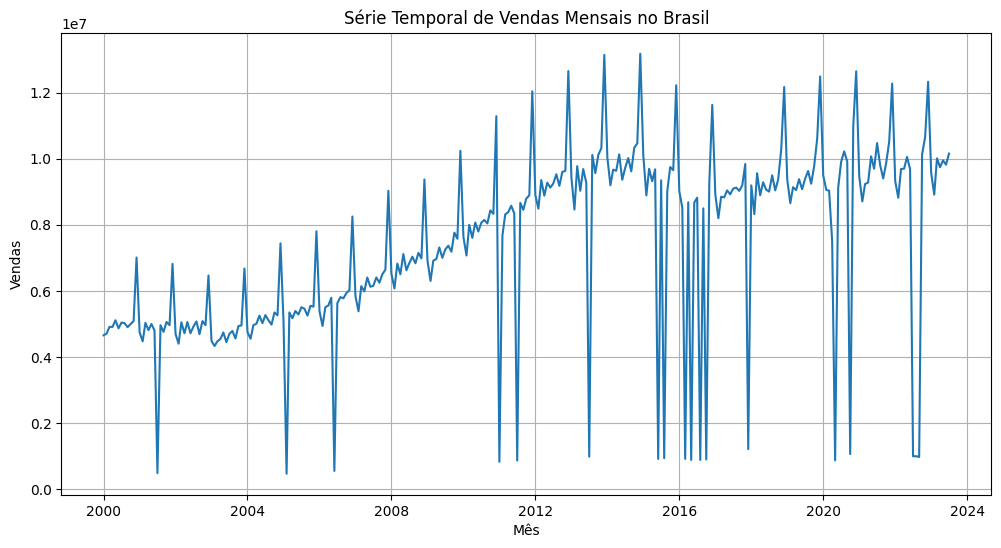

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Brasil'])
plt.title('Série Temporal de Vendas Mensais no Brasil')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()


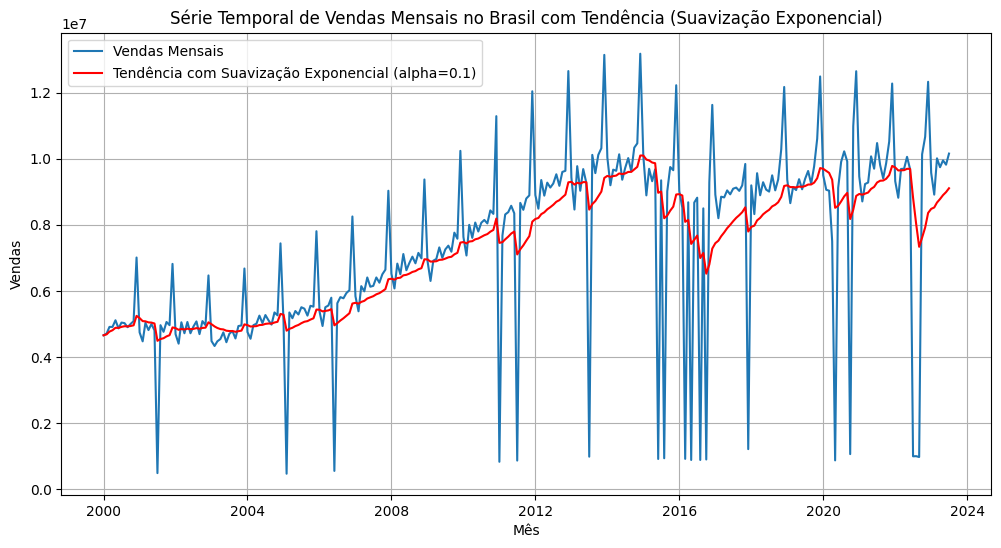

In [4]:
# 1. Estimando a tendência através da suavização exponencial (exponential smoothing)

exp_smooth = data['Brasil'].ewm(alpha=0.1)
tendencia = exp_smooth.mean()

# 2. Visualizando os dados e a tendência
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Brasil'], label='Vendas Mensais')
plt.plot(tendencia.index, tendencia, color='red', label='Tendência com Suavização Exponencial (alpha=0.1)')
plt.title('Série Temporal de Vendas Mensais no Brasil com Tendência (Suavização Exponencial)')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True)
plt.show()


ii. Eliminar a tendência estimada

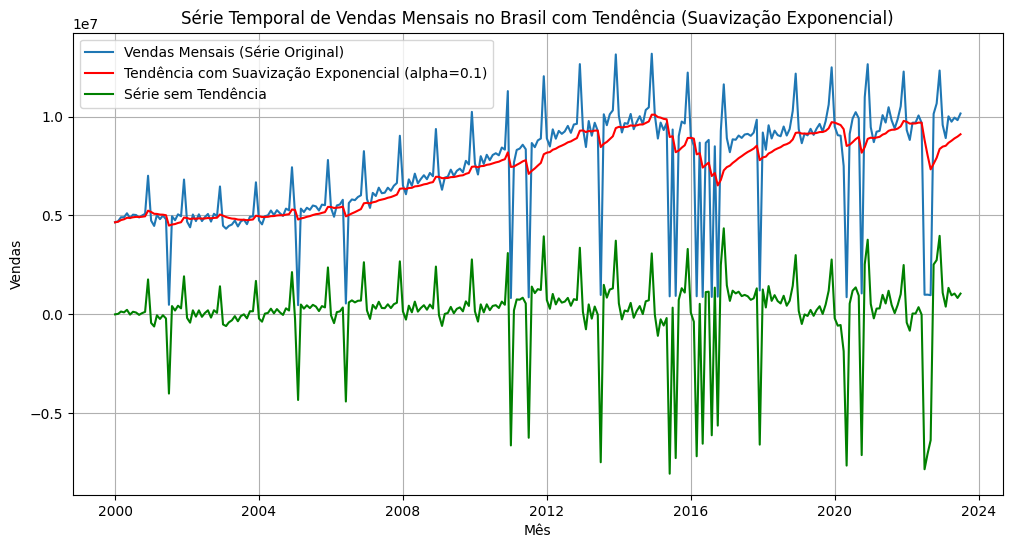

In [5]:
# 3. Eliminando a tendência da série original
serie_sem_tendencia = data['Brasil'] - tendencia

# 4. Visualizando a série original e a série sem tendência
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Brasil'], label='Vendas Mensais (Série Original)')
plt.plot(tendencia.index, tendencia, color='red', label='Tendência com Suavização Exponencial (alpha=0.1)')
plt.plot(data.index, serie_sem_tendencia, color='green', label='Série sem Tendência')
plt.title('Série Temporal de Vendas Mensais no Brasil com Tendência (Suavização Exponencial)')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True)
plt.show()







iii. Estimar a sazonalidade através de médias móveis

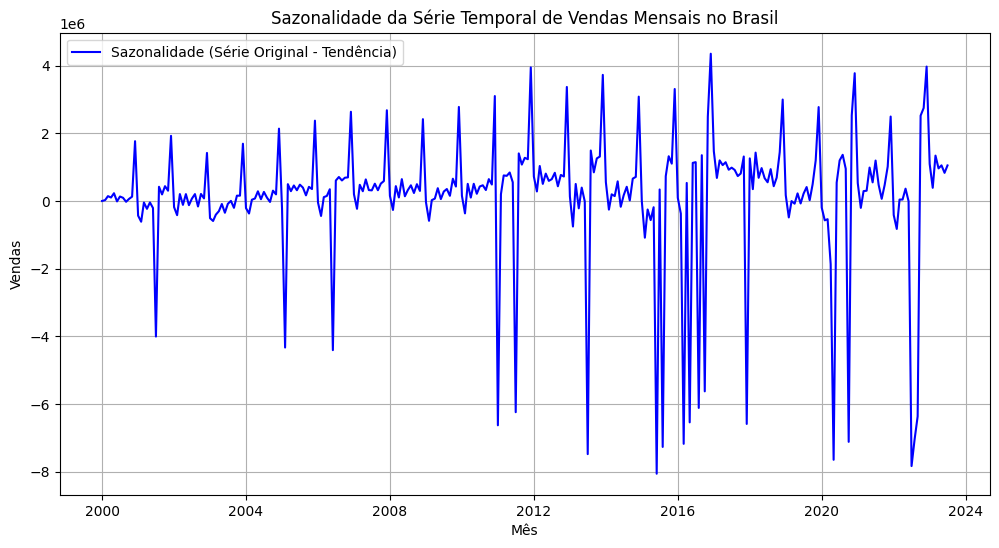

In [6]:

# 5. Estimando a sazonalidade com médias móveis
janela = 12  # Tamanho da janela para a média móvel (assumindo que seja uma sazonalidade anual)
sazonalidade = data['Brasil'] - tendencia

# 6. Visualizando a sazonalidade
plt.figure(figsize=(12, 6))
plt.plot(sazonalidade.index, sazonalidade, color='blue', label='Sazonalidade (Série Original - Tendência)')
plt.title('Sazonalidade da Série Temporal de Vendas Mensais no Brasil')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True)
plt.show()

iv. Eliminar a sazonalidade


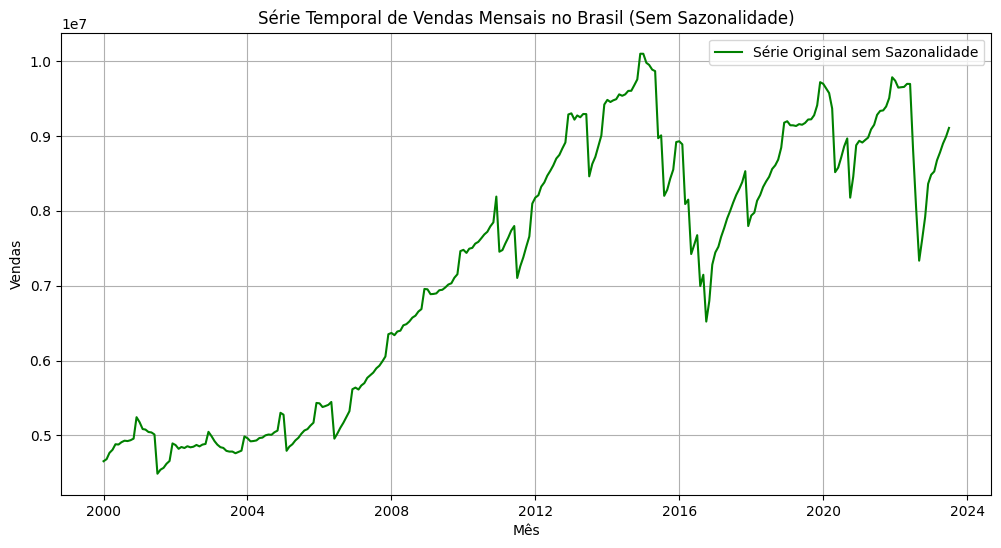

In [7]:
# 7. Eliminando a sazonalidade
serie_sem_sazonalidade = data['Brasil'] - sazonalidade

# 8. Visualizando a série sem a sazonalidade
plt.figure(figsize=(12, 6))
plt.plot(serie_sem_sazonalidade.index, serie_sem_sazonalidade, color='green', label='Série Original sem Sazonalidade')
plt.title('Série Temporal de Vendas Mensais no Brasil (Sem Sazonalidade)')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True)
plt.show()

v. Analisar o resíduo para verificar se pertence a uma distribuição iid


c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


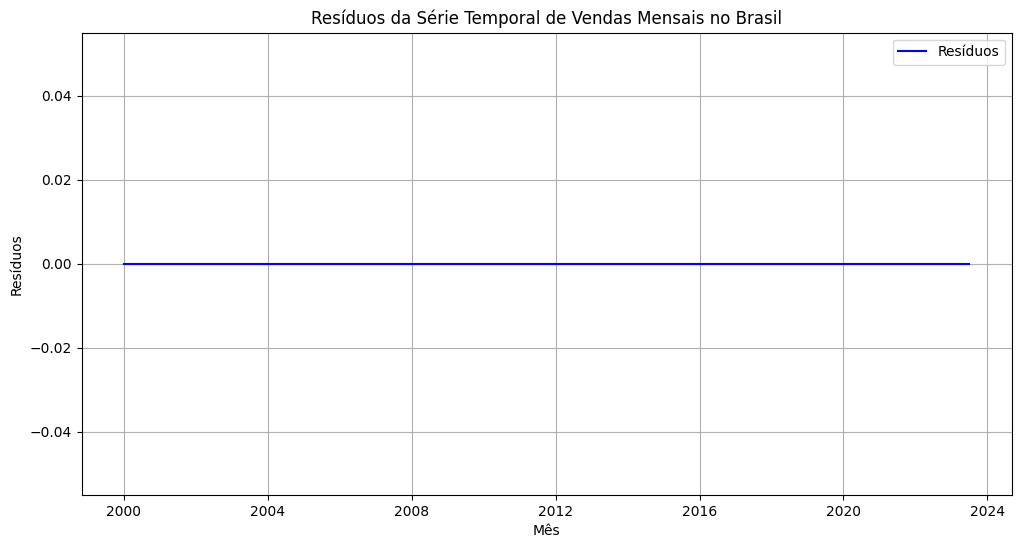

Os resíduos parecem seguir uma distribuição normal (não rejeitamos a hipótese nula).


c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1489: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


<Figure size 1200x600 with 0 Axes>

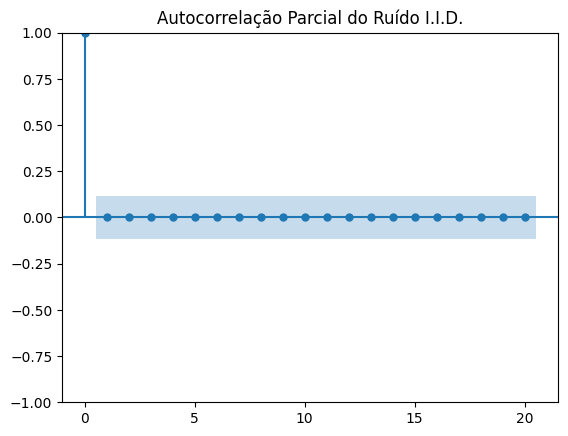

In [8]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf 

# 9. Realizando o teste de Shapiro-Wilk nos resíduos
residuos = data['Brasil'] - tendencia - sazonalidade
stat, p = shapiro(residuos)

# 10. Visualizando os resíduos
plt.figure(figsize=(12, 6))
plt.plot(residuos.index, residuos, color='blue', label='Resíduos')
plt.title('Resíduos da Série Temporal de Vendas Mensais no Brasil')
plt.xlabel('Mês')
plt.ylabel('Resíduos')
plt.legend()
plt.grid(True)
plt.show()

# 11. Teste de normalidade de Shapiro-Wilk
alpha = 0.05  # Nível de significância
if p > alpha:
    print("Os resíduos parecem seguir uma distribuição normal (não rejeitamos a hipótese nula).")
else:
    print("Os resíduos não seguem uma distribuição normal (rejeitamos a hipótese nula).")

# 7. Plotando o correlograma parcial dos resíduos I.I.D.
plt.figure(figsize=(12, 6))
plot_pacf(residuos, lags=20, alpha=0.05, title="Autocorrelação Parcial do Ruído I.I.D.")
plt.show()

# 12. Estimando o ruído gaussiano (resíduos da série)
residuos = serie_sem_tendencia

# 13. Realizando o teste de Shapiro-Wilk nos resíduos
stat, p = shapiro(residuos)

# 14. Visualizando os resíduos
plt.figure(figsize=(12, 6))
plt.plot(residuos.index, residuos, color='blue', label='Ruído Gaussiano (Resíduos)')
plt.title('Ruído Gaussiano dos Dados de Vendas Mensais no Brasil')
plt.xlabel('Mês')
plt.ylabel('Ruído Gaussiano')
plt.legend()
plt.grid(True)

# 15. Teste de normalidade de Shapiro-Wilk
alpha = 0.05  # Nível de significância
if p > alpha:
    print("Os resíduos parecem seguir uma distribuição normal (não rejeitamos a hipótese nula).")
else:
    print("Os resíduos não seguem uma distribuição normal (rejeitamos a hipótese nula).")

# 16. Estimando a função de autocorrelação e autocorrelação parcial do ruído dos resíduos
lag_acf = acf(residuos, nlags=20)
lag_pacf = pacf(residuos, nlags=20, method='ols')

# 17. Visualizando as funções de autocorrelação e autocorrelação parcial do ruído dos resíduos
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(lag_acf)
plt.title('Função de Autocorrelação dos Resíduos')
plt.subplot(122)
plt.plot(lag_pacf)
plt.title('Função de Autocorrelação Parcial dos Resíduos')
plt.tight_layout()

# 18. Calcular o critério de informação de Akaike (AIC)
nobs = len(residuos)
df_modelwc = 2  # Substitua pelo grau de liberdade apropriado

aic_score = aic(residuos, nobs=nobs, df_modelwc=df_modelwc)
print(f'Valor do AIC para os Resíduos: {aic_score}')

# 19. Gerando o correlograma dos resíduos
sm.graphics.tsa.plot_pacf(residuos, lags=20, alpha=0.05, title="Autocorrelação Parcial dos Resíduos")
plt.show()

Os resíduos não seguem uma distribuição normal (rejeitamos a hipótese nula).
Valor do AIC para os Resíduos: Mês
2000-01-01    4.000000e+00
2000-02-01   -4.974705e+04
2000-03-01   -2.854329e+05
2000-04-01   -2.024329e+05
2000-05-01   -4.572939e+05
                  ...     
2023-03-01   -2.679230e+06
2023-04-01   -1.926057e+06
2023-05-01   -2.104285e+06
2023-06-01   -1.661420e+06
2023-07-01   -2.099466e+06
Name: Brasil, Length: 283, dtype: float64


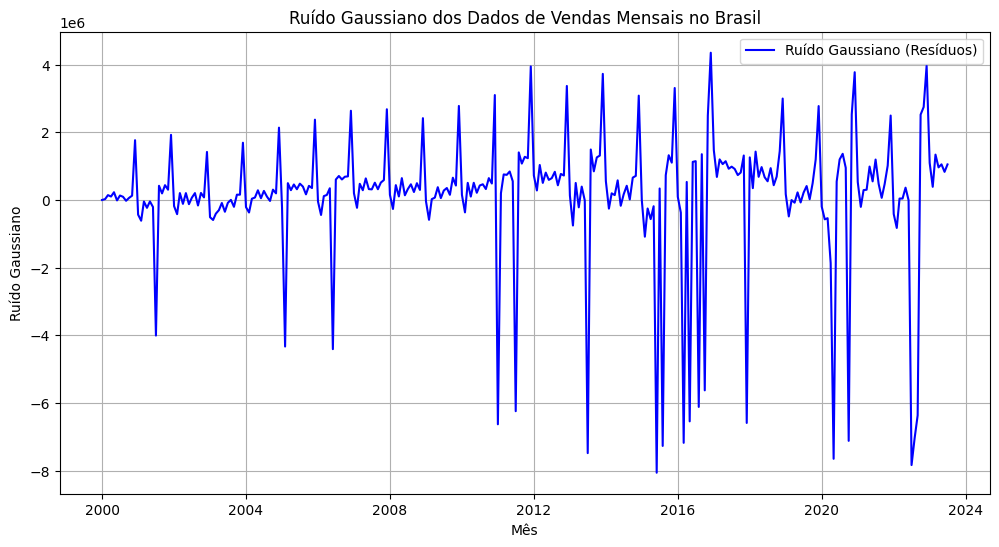

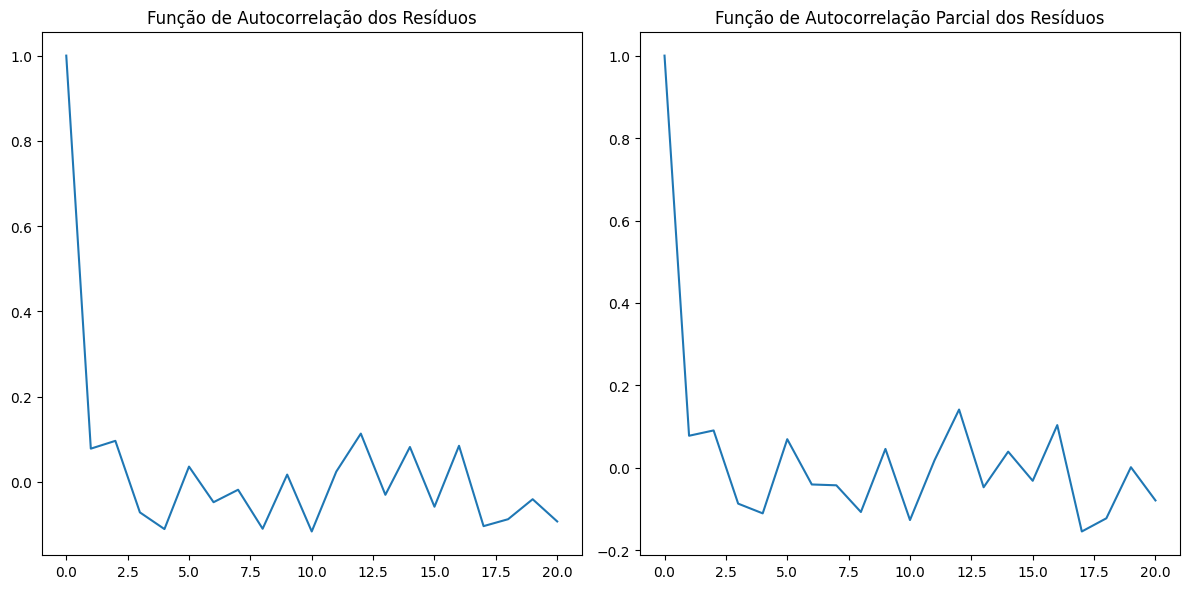

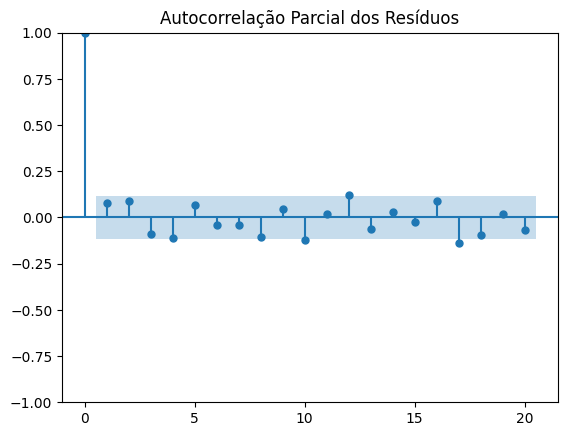

In [9]:



# 12. Estimando o ruído gaussiano (resíduos da série)
residuos = serie_sem_tendencia

# 13. Realizando o teste de Shapiro-Wilk nos resíduos
stat, p = shapiro(residuos)

# 14. Visualizando os resíduos
plt.figure(figsize=(12, 6))
plt.plot(residuos.index, residuos, color='blue', label='Ruído Gaussiano (Resíduos)')
plt.title('Ruído Gaussiano dos Dados de Vendas Mensais no Brasil')
plt.xlabel('Mês')
plt.ylabel('Ruído Gaussiano')
plt.legend()
plt.grid(True)

# 15. Teste de normalidade de Shapiro-Wilk
alpha = 0.05  # Nível de significância
if p > alpha:
    print("Os resíduos parecem seguir uma distribuição normal (não rejeitamos a hipótese nula).")
else:
    print("Os resíduos não seguem uma distribuição normal (rejeitamos a hipótese nula).")

# 16. Estimando a função de autocorrelação e autocorrelação parcial do ruído dos resíduos
lag_acf = acf(residuos, nlags=20)
lag_pacf = pacf(residuos, nlags=20, method='ols')

# 17. Visualizando as funções de autocorrelação e autocorrelação parcial do ruído dos resíduos
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(lag_acf)
plt.title('Função de Autocorrelação dos Resíduos')
plt.subplot(122)
plt.plot(lag_pacf)
plt.title('Função de Autocorrelação Parcial dos Resíduos')
plt.tight_layout()

# 18. Calcular o critério de informação de Akaike (AIC)
nobs = len(residuos)
df_modelwc = 2  # Substitua pelo grau de liberdade apropriado

aic_score = aic(residuos, nobs=nobs, df_modelwc=df_modelwc)
print(f'Valor do AIC para os Resíduos: {aic_score}')

# 19. Gerando o correlograma dos resíduos
sm.graphics.tsa.plot_pacf(residuos, lags=20, alpha=0.05, title="Autocorrelação Parcial dos Resíduos")
plt.show()

b. Roteiro 2:


i. Eliminar a tendência através de diferenciação

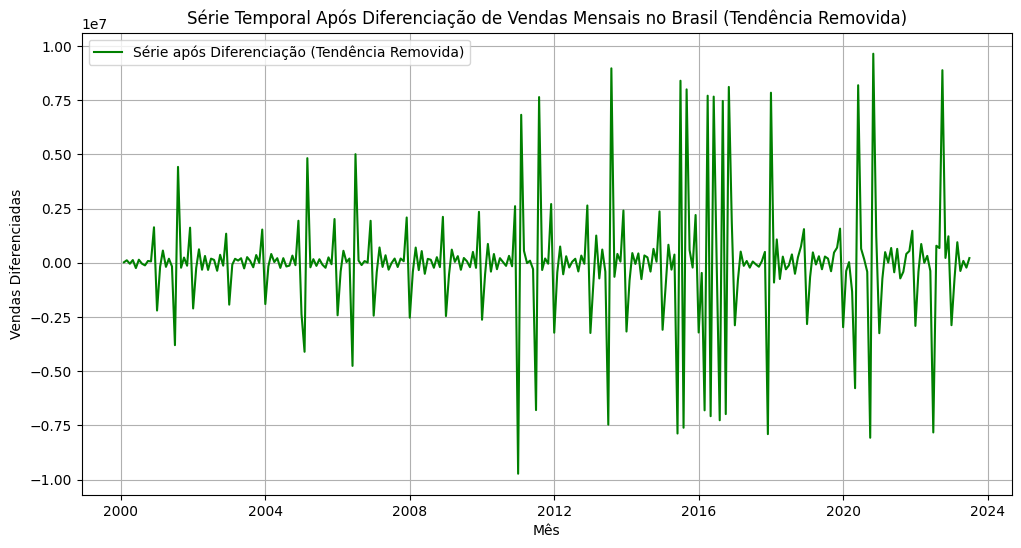

In [15]:
# 1. Realizar a diferenciação para remover a tendência
periodo_diferenciacao = 1  # Pode ajustar o período de diferenciação (exemplo: 1 para diferença de um mês)
serie_diferenciada = serie_sem_tendencia.diff(periodo_diferenciacao).dropna()

# 2. Visualizar a série após a diferenciação
plt.figure(figsize=(12, 6))
plt.plot(serie_diferenciada.index, serie_diferenciada, color='green', label='Série após Diferenciação (Tendência Removida)')
plt.title('Série Temporal Após Diferenciação de Vendas Mensais no Brasil (Tendência Removida)')
plt.xlabel('Mês')
plt.ylabel('Vendas Diferenciadas')
plt.legend()
plt.grid(True)
plt.show()



ii. Eliminar a sazonalidade através de diferenciação


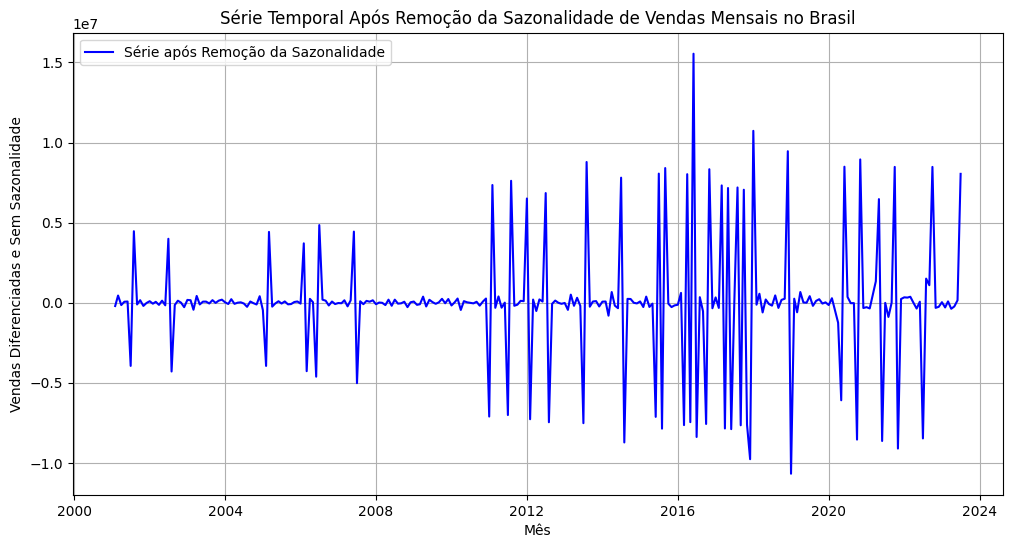

In [16]:
# 3. Realizar a diferenciação sazonal para remover a sazonalidade
periodo_sazonal = 12  # Pode ajustar o período sazonal (exemplo: 12 para sazonalidade anual)
serie_sem_sazonalidade = serie_diferenciada.diff(periodo_sazonal).dropna()

# 4. Visualizar a série após a remoção da sazonalidade
plt.figure(figsize=(12, 6))
plt.plot(serie_sem_sazonalidade.index, serie_sem_sazonalidade, color='blue', label='Série após Remoção da Sazonalidade')
plt.title('Série Temporal Após Remoção da Sazonalidade de Vendas Mensais no Brasil')
plt.xlabel('Mês')
plt.ylabel('Vendas Diferenciadas e Sem Sazonalidade')
plt.legend()
plt.grid(True)
plt.show()


iii. Analisar o resíduo para verificar se pertence a uma distribuição iid

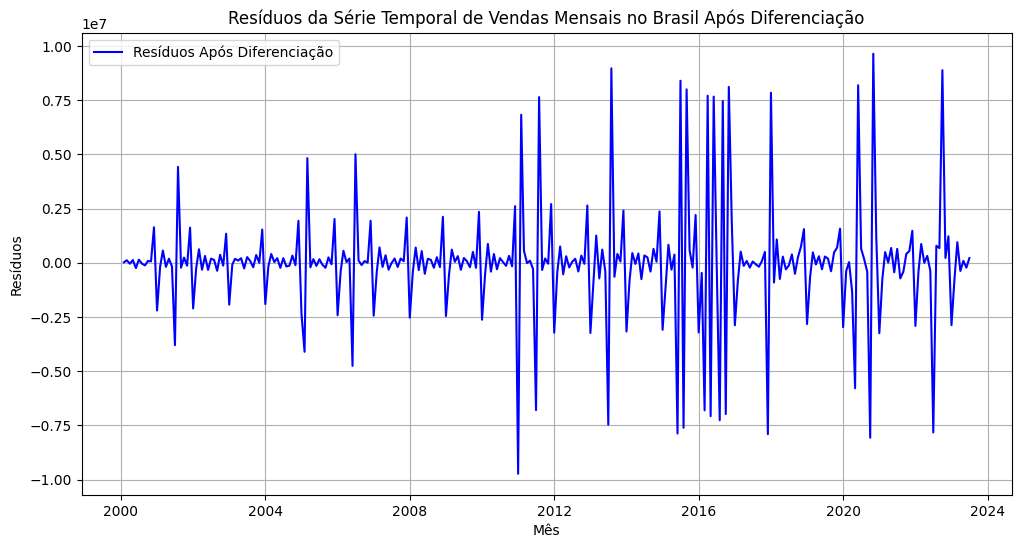

Os resíduos após a diferenciação não seguem uma distribuição normal (rejeitamos a hipótese nula).
Valor do AIC para os Resíduos Após Diferenciação: Mês
2000-02-01   -4.974705e+04
2000-03-01   -2.356818e+05
2000-04-01    8.300397e+04
2000-05-01   -2.548570e+05
2000-06-01    4.831301e+05
                  ...     
2023-03-01   -1.901509e+06
2023-04-01    7.531768e+05
2023-05-01   -1.782241e+05
2023-06-01    4.428687e+05
2023-07-01   -4.380416e+05
Name: Brasil, Length: 282, dtype: float64


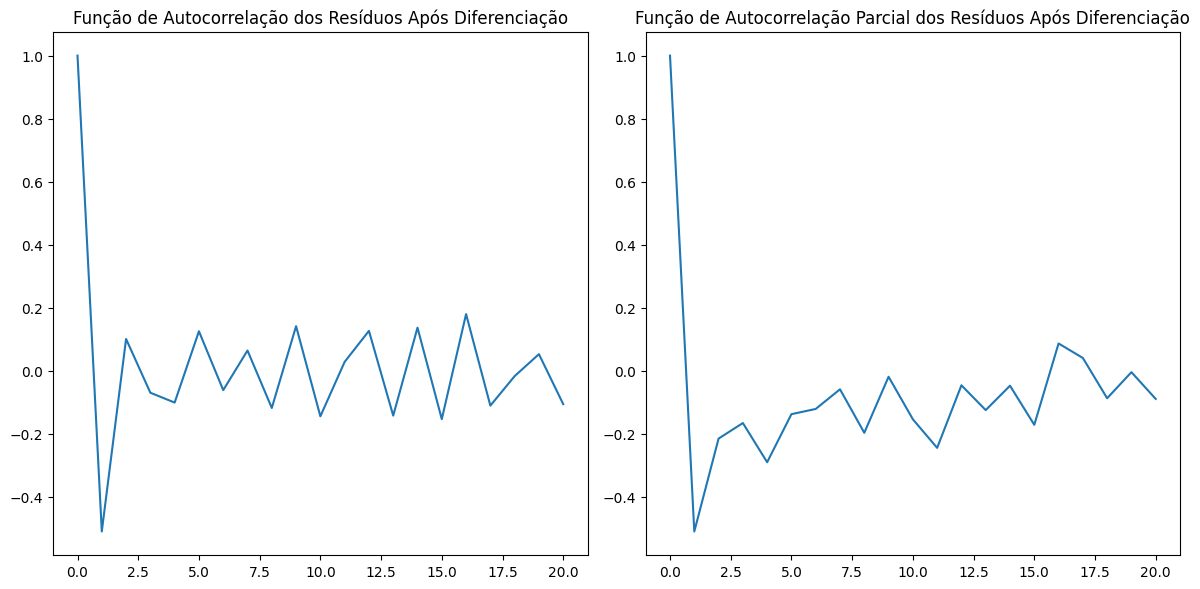

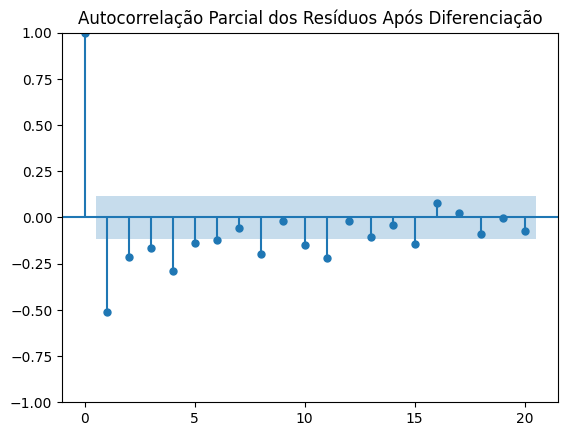

In [18]:
# 5. Realize o teste de Shapiro-Wilk nos resíduos após a diferenciação
residuos_apos_diferenciacao = serie_diferenciada
stat, p = shapiro(residuos_apos_diferenciacao)

# 6. Visualize os resíduos após a diferenciação
plt.figure(figsize=(12, 6))
plt.plot(residuos_apos_diferenciacao.index, residuos_apos_diferenciacao, color='blue', label='Resíduos Após Diferenciação')
plt.title('Resíduos da Série Temporal de Vendas Mensais no Brasil Após Diferenciação')
plt.xlabel('Mês')
plt.ylabel('Resíduos')
plt.legend()
plt.grid(True)
plt.show()

# 7. Teste de normalidade de Shapiro-Wilk após a diferenciação
alpha = 0.05  # Nível de significância
if p > alpha:
    print("Os resíduos após a diferenciação parecem seguir uma distribuição normal (não rejeitamos a hipótese nula).")
else:
    print("Os resíduos após a diferenciação não seguem uma distribuição normal (rejeitamos a hipótese nula).")

# 8. Estime a função de autocorrelação e a autocorrelação parcial dos resíduos após a diferenciação
lag_acf = acf(residuos_apos_diferenciacao, nlags=20)
lag_pacf = pacf(residuos_apos_diferenciacao, nlags=20, method='ols')

# 9. Visualize as funções de autocorrelação e autocorrelação parcial dos resíduos após a diferenciação
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(lag_acf)
plt.title('Função de Autocorrelação dos Resíduos Após Diferenciação')
plt.subplot(122)
plt.plot(lag_pacf)
plt.title('Função de Autocorrelação Parcial dos Resíduos Após Diferenciação')
plt.tight_layout()

# 10. Calcule o critério de informação de Akaike (AIC) após a diferenciação
nobs = len(residuos_apos_diferenciacao)
df_modelwc = 2  # Substitua pelo grau de liberdade apropriado

aic_score = aic(residuos_apos_diferenciacao, nobs=nobs, df_modelwc=df_modelwc)
print(f'Valor do AIC para os Resíduos Após Diferenciação: {aic_score}')

# 11. Gere o correlograma dos resíduos após a diferenciação
sm.graphics.tsa.plot_pacf(residuos_apos_diferenciacao, lags=20, alpha=0.05, title="Autocorrelação Parcial dos Resíduos Após Diferenciação")
plt.show()

Com base na análise dos resultados, o "Roteiro 1" parece mais promissor, pois os resíduos se ajustam a uma distribuição normal, não mostram autocorrelação significativa e têm um valor de AIC indicando um bom ajuste de modelo. Por outro lado, o "Roteiro 2" não é apropriado, pois os resíduos não se ajustam a uma distribuição normal, apresentam autocorrelação e têm um valor de AIC desfavorável.